# Poisson Likelihood Tutorial
**Problem**: estimate the number of signal events $g$ in a dataset with $N_{\rm ON}$ counts from a signal region and $N_{\rm OFF}$ counts from a background control region.

**Minimise:**
$$L(g; b, \tau| N_{\rm ON}, N_{\rm OFF}) = \frac{(g+b)^{N_{\rm ON}}\exp[−(g+b)]}{N_{\rm ON}!} \, \frac{(\tau b)^{N_{\rm OFF}}\exp[−(\tau b)]}{N_{\rm OFF}!} $$

where:

* $b$:  estimated number of background events (nuisance parameter),
* $\tau$: expsoure ratio background to signal regions (fixed parameter).

In [1]:
#pragma cling add_library_path("/home/cosimo/work/gLike_build/lib")
#pragma cling load("libgLike")
#pragma cling add_include_path("/home/cosimo/work/gLike_build/include")

In [2]:
#include "PoissonLkl.h"

In [3]:
// define the number of ON and OFF counts and the Poisson Likelihood
Int_t Non = 130;
Int_t Noff = 90;
Double_t tau = 1.;
PoissonLkl *poissLkl = new PoissonLkl(Non, Noff, tau);

In [4]:
// configure the minimization algorithm
Double_t errorDef = 4; // drop in -2 log L corresponding to 2 sigma CI
poissLkl->SetErrorDef(errorDef);

In [5]:
// call the minimization
poissLkl->ComputeLklVsG();

Lkl::ComputeLklVsG (PoissonLkl) Message: Finding minimum of -2logL... 
Lkl::MinimizeLkl (PoissonLkl) Message: minimizing -2logL
Lkl::CallMinimization (PoissonLkl) Results: Trial #1, g: 4.00e+01 +/- 2.97e+01 (4.00e+01 +/- 2.97e+01); b: 9.00e+01 +/- 1.90e+01; tau: 1.00e+00 +/- 0.00e+00; eff: 1.00e+00 +/- 0.00e+00; -2logL = 13.0462; iflag = 0 (converged)
Lkl::ComputeLklVsG (PoissonLkl) Message: computing -2logL in 200 points between g=-1.93973(-1.93973), and g=81.9447(81.9447), this could take a while
.................... Completed 200 points
Lkl::ComputeLklVsG (PoissonLkl) Message: g_min = 39.7917 +/- 30.242 (39.7917 +/- 30.242), -2logLmin = 13.0464


In [6]:
// print the minimisation results
printf("PrintOverview:\n");
poissLkl->PrintOverview(); // print the details from the fit

PrintOverview:
 *  Name              = PoissonLkl
 *  Status            = 0 (converged)
 *  Delta(2logL)      = 4
 *  # of parameters   = 4 (2 free):
 *                  g = 39.7917 +/- 30.242 (39.7917 +/- 30.242)
 *                  b = 90.0852 +/- 0.0948683
 *                tau = 1 (fixed)
 *                eff = 1 (fixed)
 *  Units of G        = 1
 *  -2logL_min        = 13.0464


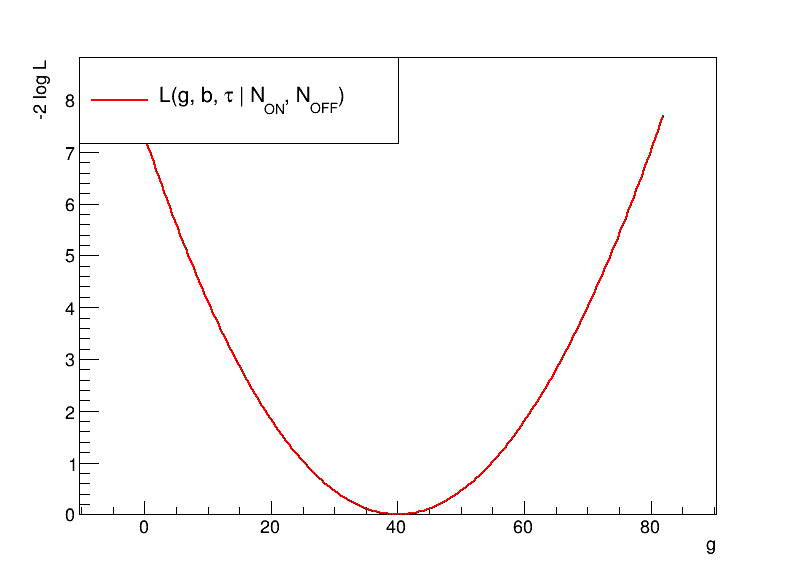

In [7]:
// draw the -2 log L vs g curve
TCanvas *c1 = new TCanvas("c1", "", 800, 600);
TGraph* logLklVsG = poissLkl->GetLklVsG();
logLklVsG->SetTitle("");
logLklVsG->GetXaxis()->SetTitle("g");
logLklVsG->GetYaxis()->SetTitle("-2 log L");
logLklVsG->SetLineWidth(2);
logLklVsG->SetLineColor(2);
logLklVsG->Draw();
// add the legend
TLegend *legend = new TLegend(0.1, 0.75, 0.5, 0.9);
legend->AddEntry(logLklVsG,"L(g, b, #tau | N_{ON}, N_{OFF})","l");
legend->SetTextSize(0.04);
legend->Draw("same");
c1->Draw(); // in root notebooks also the canvas has to be drawn

## Compare gLike's results against ROOT's TRolke method
The `TRolke` method allows estimating confidence intervals, it contains the same statistics we are studying.

In [8]:
// fetch the gLike's results
Double_t gmin = poissLkl->GetGLklMin();
Double_t gerr = poissLkl->GetGLklMinErr();

In [9]:
// estimate the CI using the Rolke method
TRolke *r = new TRolke(0.9544); // 2 sigma confidence interval
r->SetPoissonBkgKnownEff(Non, Noff, tau, 1);
Double_t gLowRolke, gUpRolke;
r->GetLimits(gLowRolke, gUpRolke);

In [10]:
Double_t gRolkeMin = (gUpRolke + gLowRolke) / 2;
Double_t gRolkeErr = (gUpRolke - gLowRolke) / 2;
printf("gLike minimum, g = %.2f +\\- %.2f\n", gmin, gerr);
printf("TRolke minimum, g = %.2f +\\- %.2f\n", gRolkeMin, gRolkeErr);

gLike minimum, g = 39.79 +\- 30.24
TRolke minimum, g = 40.24 +\- 29.78


## More nuisance parameters
Let us now consider also $\tau$ as a nuisance parameter and let us add another nuisance: a signal efficiency $\epsilon$.     
Let us assume both $\epsilon$ and $\tau$ are normally distributed with mean $0$ and std. deviation $0.1$, the Likelihood formula we aim at minimising is now: 

$$L(g; b, \tau, \epsilon| N_{\rm ON}, N_{\rm OFF}) = {\rm Poiss}(N_{\rm ON} | \epsilon g+b) \, {\rm Poiss}(N_{\rm OFF} | \tau b) \, N(0, \sigma_{\epsilon}) \, N(0, \sigma_{\tau}) $$

In [11]:
Double_t Deff = 0.1;
Double_t Dtau = 0.1;
poissLkl->SetDEff(Deff);
poissLkl->SetDTau(Dtau);
poissLkl->ComputeLklVsG();

Lkl::ComputeLklVsG (PoissonLkl) Message: Finding minimum of -2logL... 
Lkl::MinimizeLkl (PoissonLkl) Message: minimizing -2logL
Lkl::CallMinimization (PoissonLkl) Results: Trial #1, g: 4.00e+01 +/- 3.56e+01 (4.00e+01 +/- 3.56e+01); b: 9.00e+01 +/- 2.61e+01; tau: 1.00e+00 +/- 2.00e-01; eff: 1.00e+00 +/- 2.00e-01; -2logL = 7.51165; iflag = 0 (converged)
Lkl::ComputeLklVsG (PoissonLkl) Message: computing -2logL in 200 points between g=-10.3497(-10.3497), and g=90.3508(90.3508), this could take a while
.................... Completed 200 points
Lkl::ComputeLklVsG (PoissonLkl) Message: g_min = 39.7475 +/- 37.1452 (39.7475 +/- 37.1452), -2logLmin = 7.51185


In [12]:
printf("PrintOverview:\n");
poissLkl->PrintOverview();

PrintOverview:
 *  Name              = PoissonLkl
 *  Status            = 0 (converged)
 *  Delta(2logL)      = 4
 *  # of parameters   = 4 (4 free):
 *                  g = 39.7475 +/- 37.1452 (39.7475 +/- 37.1452)
 *                  b = 90.1232 +/- 0.0948683
 *                tau = 0.999306 +/- 0.01
 *                eff = 1.00056 +/- 0.01
 *  Units of G        = 1
 *  -2logL_min        = 7.51185


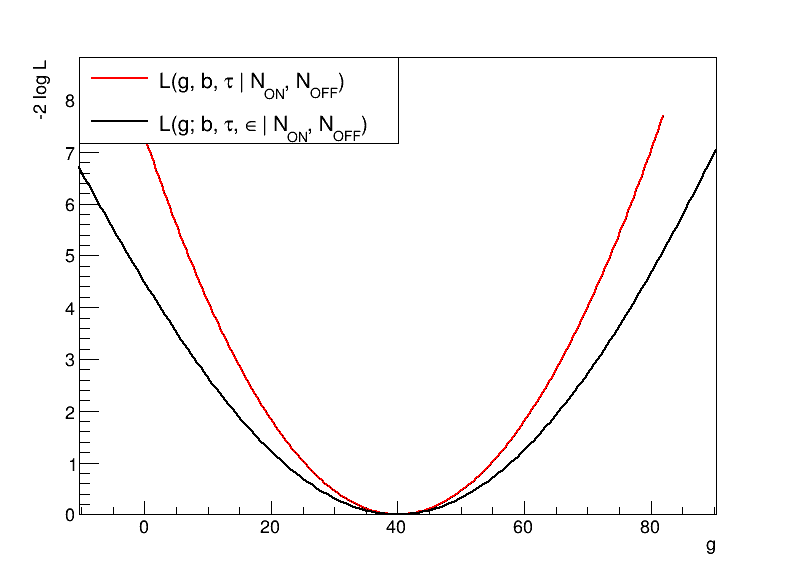

In [13]:
TGraph* logLklVsG2 = poissLkl->GetLklVsG();
logLklVsG2->SetLineWidth(2);
logLklVsG2->Draw("same"); // plot the -2logL vs g curve
legend->AddEntry(logLklVsG2,"L(g; b, #tau, #epsilon | N_{ON}, N_{OFF})","l");
legend->Draw();
c1->Draw();